In [2]:
import pickle

import numpy as np
import matplotlib
def step_function(x):
    y = x > 0
    return y.astype(float)

x = np.array([1.0,2.0,-1])
print(step_function(x))

[1. 1. 0.]


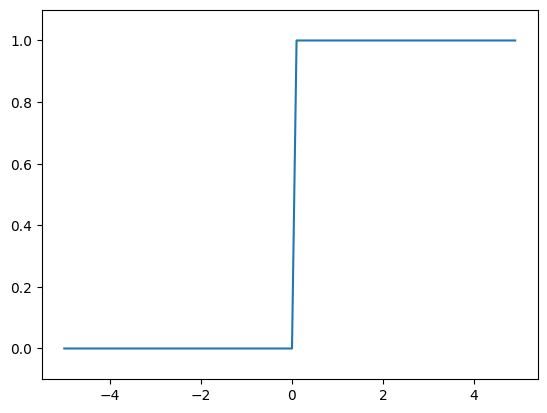

In [3]:
import numpy as np
import matplotlib.pylab as plt
def step_function(x):
    return np.array(x > 0, dtype= int)

x = np.arange(-5.0,5.0,0.1)
y = step_function(x)
plt.plot(x,y)
plt.ylim(-0.1,1.1)
plt.show()

[0.00669285 0.0066995  0.00670616 ... 0.99328718 0.99329384 0.9933005 ]


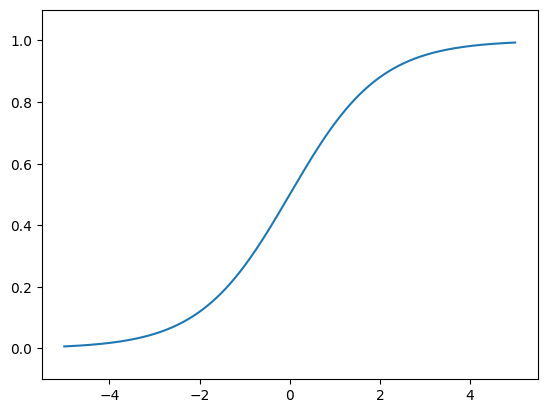

In [4]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))
x = np.array([-1,1,2])

x = np.arange(-5,5,0.001)
y = sigmoid(x)
print(y)
plt.plot(x,y)
plt.ylim(-0.1,1.1)
plt.show()

[0.    0.    0.    ... 4.997 4.998 4.999]


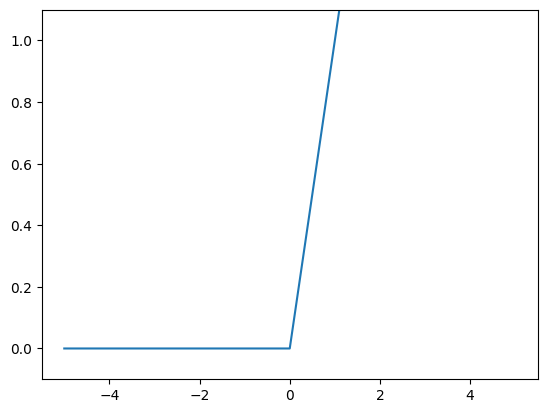

In [6]:
def relu(x):
    return np.maximum(0,x)
x = np.array([-1,1,2])

x = np.arange(-5,5,0.001)
y = relu(x)
print(y)
plt.plot(x,y)
plt.ylim(-0.1,1.1)
plt.show()

numpy多维数组

In [11]:
import numpy as np
A = np.array([1,2,3,4])
print(A)
print(np.ndim(A))
print(A.shape)
print(A.shape[0])

[1 2 3 4]
1
(4,)
4


In [15]:
X = np.array([1,2])
print(X.shape)

W = np.array([[1,3,5],[2,4,6]])
print(W)
print(W.shape)

Y = np.dot(X,W)
print(Y)


(2,)
[[1 3 5]
 [2 4 6]]
(2, 3)
[ 5 11 17]


In [23]:
X=np.array([1.0,0.5])
W1 = np.array([[0.1,0.3,0.5],[0.2,0.4,0.6]])
B1 = np.array([0.1,0.2,0.3])

A1 = np.dot(X, W1) + B1
print(A1)
Z1 = sigmoid(A1)
print(Z1)

W2 = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
B2 = np.array([0.1, 0.2])
print(Z1.shape) # (3,)
print(W2.shape) # (3, 2)
print(B2.shape) # (2,)
A2 = np.dot(Z1, W2) + B2
Z2 = sigmoid(A2)
print(Z2)

def identity_function(x):
    return x

[0.3 0.7 1.1]
[0.57444252 0.66818777 0.75026011]
(3,)
(3, 2)
(2,)
[0.62624937 0.7710107 ]


代码小结

In [24]:
def init_network():
    network = {}
    network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
    network['b1'] = np.array([0.1, 0.2, 0.3])
    network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
    network['b2'] = np.array([0.1, 0.2])
    network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
    network['b3'] = np.array([0.1, 0.2])
    return network
def forward(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = identity_function(a3)
    return y
network = init_network()
x = np.array([1.0, 0.5])
y = forward(network, x)
print(y) # [ 0.31682708 0.69627909]

[0.31682708 0.69627909]


softmax 及防止溢出的 softmax
因此，神经网络在进行分类时，输出层的softmax函数可以省略。在实际的问题中，由于指数函数的运算需要一定的计算机运算量，因此输出层的softmax函数一般会被省略

In [28]:
a = np.array([0.3,2.9,4.0])

exp_a = np.exp(a)
print(exp_a)

sum_exp_a = np.sum(exp_a)
print(sum_exp_a)

y = exp_a/ sum_exp_a
print(y)

[ 1.34985881 18.17414537 54.59815003]
74.1221542101633
[0.01821127 0.24519181 0.73659691]


In [42]:
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    return y

In [32]:
a = np.array([1010, 1000, 990])
# np.exp(a) / np.sum(np.exp(a))
c = np.max(a) # 1010
a - c
np.exp(a - c) / np.sum(np.exp(a - c))

array([9.99954600e-01, 4.53978686e-05, 2.06106005e-09])

In [50]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 为了导入父目录的文件而进行的设定
import numpy as np
from sample_code.dataset.mnist import load_mnist
from PIL import Image


def img_show(img):
    pil_img = Image.fromarray(np.uint8(img))
    pil_img.show()

(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)

img = x_train[0]
label = t_train[0]
print(label)  # 5

print(img.shape)  # (784,)
img = img.reshape(28, 28)  # 把图像的形状变为原来的尺寸
print(img.shape)  # (28, 28)

img_show(img)

5
(784,)
(28, 28)


In [52]:
import pickle

def get_data():
    (x_train, t_train),(x_test,t_test) = load_mnist(normalize= True, flatten=True,one_hot_label=False)
    return x_test, t_test
def init_network():
    with open("sample_code/ch03/sample_weight.pkl",'rb') as f:
        network = pickle.load(f)
    return network

def predict(network, x):
    W1,W2,W3 = network['W1'], network['W2'],network['W3']
    # print(W1.shape,W2.shape,W3.shape)
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)
    return y

x, t = get_data()
network = init_network()
accuracy_cnt = 0
for i in range(len(x)):
    y = predict(network, x[i])
    p = np.argmax(y) # 获取概率最高的元素的索引
    if p == t[i]:
        accuracy_cnt += 1
print("Accuracy:" + str(float(accuracy_cnt) / len(x)))

Accuracy:0.9352


批处理 batch

In [55]:
x, t = get_data()
network = init_network()
batch_size = 100 # 批数量
accuracy_cnt = 0
for i in range(0, len(x), batch_size):
    x_batch = x[i:i+batch_size]
    y_batch = predict(network, x_batch)
    print(x_batch.shape)
    print(y_batch.shape)
    p = np.argmax(y_batch, axis=1)
    print(p.shape, t[i:i+batch_size].shape)
    accuracy_cnt += np.sum(p == t[i:i+batch_size])
print("Accuracy:" + str(float(accuracy_cnt) / len(x)))

(100, 784)
(100, 10)
(100,) (100,)
(100, 784)
(100, 10)
(100,) (100,)
(100, 784)
(100, 10)
(100,) (100,)
(100, 784)
(100, 10)
(100,) (100,)
(100, 784)
(100, 10)
(100,) (100,)
(100, 784)
(100, 10)
(100,) (100,)
(100, 784)
(100, 10)
(100,) (100,)
(100, 784)
(100, 10)
(100,) (100,)
(100, 784)
(100, 10)
(100,) (100,)
(100, 784)
(100, 10)
(100,) (100,)
(100, 784)
(100, 10)
(100,) (100,)
(100, 784)
(100, 10)
(100,) (100,)
(100, 784)
(100, 10)
(100,) (100,)
(100, 784)
(100, 10)
(100,) (100,)
(100, 784)
(100, 10)
(100,) (100,)
(100, 784)
(100, 10)
(100,) (100,)
(100, 784)
(100, 10)
(100,) (100,)
(100, 784)
(100, 10)
(100,) (100,)
(100, 784)
(100, 10)
(100,) (100,)
(100, 784)
(100, 10)
(100,) (100,)
(100, 784)
(100, 10)
(100,) (100,)
(100, 784)
(100, 10)
(100,) (100,)
(100, 784)
(100, 10)
(100,) (100,)
(100, 784)
(100, 10)
(100,) (100,)
(100, 784)
(100, 10)
(100,) (100,)
(100, 784)
(100, 10)
(100,) (100,)
(100, 784)
(100, 10)
(100,) (100,)
(100, 784)
(100, 10)
(100,) (100,)
(100, 784)
(100, 10)